## Data Description:

For this case study, I'm utilizing publicly available data from Divvy, a real-world bike-share program in Chicago. The dataset has been anonymized and ethically sourced according to the terms of Motivate International Inc.'s data license agreement (http://www.divvybikes.com/data-license-agreement). It spans a full year, covering January 2022 to December 2023.

Changes: 
I've chosen to rename the dataset name to "Cyclistic" for project relevance.

## **Data Preparation:**

In [2]:
import os
import pandas as pd

# Directory path where CSV files are located
directory_path = r'C:\Users\raksh\OneDrive\Desktop\portfolio projects\Project#2 - case study 1\Sample copy'

# List all CSV files in the directory
all_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame
df = pd.DataFrame()

# Load all files into a single DataFrame
for file in all_files:
    file_path = os.path.join(directory_path, file)
    df_temp = pd.read_csv(file_path)
    df = pd.concat([df, df_temp], ignore_index=True)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   ride_length         object 
 5   day_of_week         float64
 6   start_station_name  object 
 7   start_station_id    object 
 8   end_station_name    object 
 9   end_station_id      object 
 10  start_lat           float64
 11  start_lng           float64
 12  end_lat             float64
 13  end_lng             float64
 14  member_casual       object 
 15  started_at.1        float64
dtypes: float64(6), object(10)
memory usage: 698.2+ MB
None


In [4]:
df

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at.1
0,F96D5A74A3E41399,electric_bike,21-01-2023 20:05,21-01-2023 20:16,00:11:00,7.0,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member,NaN
1,13CB7EB698CEDB88,classic_bike,10-01-2023 15:37,10-01-2023 15:46,00:09:00,3.0,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
2,BD88A2E670661CE5,electric_bike,02-01-2023 07:51,02-01-2023 08:05,00:14:00,2.0,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,NaN
3,C90792D034FED968,classic_bike,22-01-2023 10:52,22-01-2023 11:01,00:09:00,1.0,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
4,3397017529188E8A,classic_bike,12-01-2023 13:58,12-01-2023 14:13,00:15:00,5.0,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,07-12-2023 13:15,07-12-2023 13:17,00:02:13,5.0,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual,NaN
5719873,BCDA66E761CC1029,classic_bike,08-12-2023 18:42,08-12-2023 18:45,00:03:35,6.0,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,NaN
5719874,D2CF330F9C266683,classic_bike,05-12-2023 14:09,05-12-2023 14:13,00:03:50,3.0,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,NaN
5719875,3829A0D1E00EE970,electric_bike,02-12-2023 21:36,02-12-2023 21:53,00:17:38,7.0,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,41.885492,-87.652289,casual,NaN


In [3]:
# Remove duplicate rows based on 'ride_id'
df = df.drop_duplicates(subset=['ride_id'])

# Verify that duplicates are removed
print("Number of Rows after Removing Duplicates:", len(df))

Number of Rows after Removing Duplicates: 5719864


In [4]:
df_copy = df.copy()# Fill null values in start_station_name based on the first two digits after the decimal point in start_station_id
df_copy['start_station_name'] = df_copy.groupby(df_copy['start_station_id'].apply(lambda x: x.split('.')[1] if (pd.notna(x) and '.' in x) else x))['start_station_name'].transform('first')

# Fill null values in start_station_id based on start_station_name
df_copy['start_station_id'] = df_copy.groupby('start_station_name')['start_station_id'].transform('first')

# Display the updated DataFrame
print(df_copy.head())

            ride_id  rideable_type        started_at          ended_at  \
0  F96D5A74A3E41399  electric_bike  21-01-2023 20:05  21-01-2023 20:16   
1  13CB7EB698CEDB88   classic_bike  10-01-2023 15:37  10-01-2023 15:46   
2  BD88A2E670661CE5  electric_bike  02-01-2023 07:51  02-01-2023 08:05   
3  C90792D034FED968   classic_bike  22-01-2023 10:52  22-01-2023 11:01   
4  3397017529188E8A   classic_bike  12-01-2023 13:58  12-01-2023 14:13   

  ride_length  day_of_week           start_station_name start_station_id  \
0    00:11:00          7.0  Lincoln Ave & Fullerton Ave     TA1309000058   
1    00:09:00          3.0        Kimbark Ave & 53rd St     TA1309000037   
2    00:14:00          2.0       Western Ave & Lunt Ave           RP-005   
3    00:09:00          1.0        Kimbark Ave & 53rd St     TA1309000037   
4    00:15:00          5.0        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  start_lat  start_lng  \
0       Hampden Ct & Div

In [5]:
# Fill null values in end_station_name based on the first two digits after the decimal point in end_station_id
df_copy['end_station_name'] = df_copy.groupby(df_copy['end_station_id'].apply(lambda x: x.split('.')[1] if (pd.notna(x) and '.' in x) else x))['end_station_name'].transform('first')

# Fill null values in end_station_id based on end_station_name
df_copy['end_station_id'] = df_copy.groupby('end_station_name')['end_station_id'].transform('first')

# Display the updated DataFrame
print(df_copy.head())

            ride_id  rideable_type        started_at          ended_at  \
0  F96D5A74A3E41399  electric_bike  21-01-2023 20:05  21-01-2023 20:16   
1  13CB7EB698CEDB88   classic_bike  10-01-2023 15:37  10-01-2023 15:46   
2  BD88A2E670661CE5  electric_bike  02-01-2023 07:51  02-01-2023 08:05   
3  C90792D034FED968   classic_bike  22-01-2023 10:52  22-01-2023 11:01   
4  3397017529188E8A   classic_bike  12-01-2023 13:58  12-01-2023 14:13   

  ride_length  day_of_week           start_station_name start_station_id  \
0    00:11:00          7.0  Lincoln Ave & Fullerton Ave     TA1309000058   
1    00:09:00          3.0        Kimbark Ave & 53rd St     TA1309000037   
2    00:14:00          2.0       Western Ave & Lunt Ave           RP-005   
3    00:09:00          1.0        Kimbark Ave & 53rd St     TA1309000037   
4    00:15:00          5.0        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  start_lat  start_lng  \
0       Hampden Ct & Div

In [6]:
# Fill null values in start_lat based on start_station_name and start_station_id
df_copy['start_lat'] = df_copy.groupby(['start_station_name', 'start_station_id'])['start_lat'].transform('first')

# Fill null values in start_lng based on start_station_name and start_station_id
df_copy['start_lng'] = df_copy.groupby(['start_station_name', 'start_station_id'])['start_lng'].transform('first')

In [7]:
# Fill null values in end_lat based on end_station_name and end_station_id
df_copy['end_lat'] = df_copy.groupby(['end_station_name', 'end_station_id'])['end_lat'].transform('first')

# Fill null values in end_lng based on end_station_name and end_station_id
df_copy['end_lng'] = df_copy.groupby(['end_station_name', 'end_station_id'])['end_lng'].transform('first')

In [8]:
# Fill null values in start_station_id based on start_lat and start_lng
df_copy['start_station_id'] = df_copy.groupby(['start_lat', 'start_lng'])['start_station_id'].transform('first')

# Fill null values in start_station_name based on start_station_id
df_copy['start_station_name'] = df_copy.groupby('start_station_id')['start_station_name'].transform('first')

In [9]:
# Fill null values in end_station_id based on end_lat and end_lng
df_copy['end_station_id'] = df_copy.groupby(['end_lat', 'end_lng'])['end_station_id'].transform('first')

# Fill null values in end_station_name based on end_station_id
df_copy['end_station_name'] = df_copy.groupby('end_station_id')['end_station_name'].transform('first')

In [13]:
print(df_copy.head())

            ride_id  rideable_type        started_at          ended_at  \
0  F96D5A74A3E41399  electric_bike  21-01-2023 20:05  21-01-2023 20:16   
1  13CB7EB698CEDB88   classic_bike  10-01-2023 15:37  10-01-2023 15:46   
2  BD88A2E670661CE5  electric_bike  02-01-2023 07:51  02-01-2023 08:05   
3  C90792D034FED968   classic_bike  22-01-2023 10:52  22-01-2023 11:01   
4  3397017529188E8A   classic_bike  12-01-2023 13:58  12-01-2023 14:13   

  ride_length  day_of_week           start_station_name start_station_id  \
0    00:11:00          7.0  Lincoln Ave & Fullerton Ave     TA1309000058   
1    00:09:00          3.0        Kimbark Ave & 53rd St     TA1309000037   
2    00:14:00          2.0       Western Ave & Lunt Ave           RP-005   
3    00:09:00          1.0        Kimbark Ave & 53rd St     TA1309000037   
4    00:15:00          5.0        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  start_lat  start_lng  \
0       Hampden Ct & Div

In [10]:
print(df_copy.isnull().sum())

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
ride_length                 0
day_of_week            767649
start_station_name     875844
start_station_id       875844
end_station_name       929340
end_station_id         929340
start_lat              875844
start_lng              875844
end_lat                929340
end_lng                929340
member_casual               0
started_at.1          4952215
dtype: int64


In [15]:
# Display rows with null values for the specified columns
null_values = df_copy[df_copy.isnull().any(axis=1)]
print(null_values)

                  ride_id  rideable_type        started_at          ended_at  \
0        F96D5A74A3E41399  electric_bike  21-01-2023 20:05  21-01-2023 20:16   
1        13CB7EB698CEDB88   classic_bike  10-01-2023 15:37  10-01-2023 15:46   
2        BD88A2E670661CE5  electric_bike  02-01-2023 07:51  02-01-2023 08:05   
3        C90792D034FED968   classic_bike  22-01-2023 10:52  22-01-2023 11:01   
4        3397017529188E8A   classic_bike  12-01-2023 13:58  12-01-2023 14:13   
...                   ...            ...               ...               ...   
5719872  F74DF9549B504A6B  electric_bike  07-12-2023 13:15  07-12-2023 13:17   
5719873  BCDA66E761CC1029   classic_bike  08-12-2023 18:42  08-12-2023 18:45   
5719874  D2CF330F9C266683   classic_bike  05-12-2023 14:09  05-12-2023 14:13   
5719875  3829A0D1E00EE970  electric_bike  02-12-2023 21:36  02-12-2023 21:53   
5719876  A373F5B447AEA508   classic_bike  11-12-2023 13:07  11-12-2023 13:11   

        ride_length  day_of_week       

In [16]:
df_copy

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at.1
0,F96D5A74A3E41399,electric_bike,21-01-2023 20:05,21-01-2023 20:16,00:11:00,7.0,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member,NaN
1,13CB7EB698CEDB88,classic_bike,10-01-2023 15:37,10-01-2023 15:46,00:09:00,3.0,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
2,BD88A2E670661CE5,electric_bike,02-01-2023 07:51,02-01-2023 08:05,00:14:00,2.0,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,NaN
3,C90792D034FED968,classic_bike,22-01-2023 10:52,22-01-2023 11:01,00:09:00,1.0,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
4,3397017529188E8A,classic_bike,12-01-2023 13:58,12-01-2023 14:13,00:15:00,5.0,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,07-12-2023 13:15,07-12-2023 13:17,00:02:13,5.0,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,NaN
5719873,BCDA66E761CC1029,classic_bike,08-12-2023 18:42,08-12-2023 18:45,00:03:35,6.0,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,NaN
5719874,D2CF330F9C266683,classic_bike,05-12-2023 14:09,05-12-2023 14:13,00:03:50,3.0,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,NaN
5719875,3829A0D1E00EE970,electric_bike,02-12-2023 21:36,02-12-2023 21:53,00:17:38,7.0,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881370,-87.674930,41.885492,-87.652289,casual,NaN


In [17]:
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5719864 entries, 0 to 5719876
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   ride_length         object 
 5   day_of_week         float64
 6   start_station_name  object 
 7   start_station_id    object 
 8   end_station_name    object 
 9   end_station_id      object 
 10  start_lat           float64
 11  start_lng           float64
 12  end_lat             float64
 13  end_lng             float64
 14  member_casual       object 
 15  started_at.1        float64
dtypes: float64(6), object(10)
memory usage: 741.9+ MB
None


In [11]:
# Convert columns to appropriate data types
df_copy['started_at'] = pd.to_datetime(df_copy['started_at'])
df_copy['ended_at'] = pd.to_datetime(df_copy['ended_at'])
# Convert 'ride_length' to numeric 
df_copy['ride_length'] = pd.to_numeric(df_copy['ride_length'], errors='coerce')

# Convert 'ride_length' to timedelta
df_copy['ride_length'] = pd.to_timedelta(df_copy['ride_length'], unit='s')
df_copy['day_of_week'] = df_copy['day_of_week'].astype('Int64')  # Convert to nullable integer type

# Verify the updated data types
print(df_copy.dtypes)

C:\Users\raksh\AppData\Local\Temp\ipykernel_1672\1046668242.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_copy['started_at'] = pd.to_datetime(df_copy['started_at'])
C:\Users\raksh\AppData\Local\Temp\ipykernel_1672\1046668242.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_copy['ended_at'] = pd.to_datetime(df_copy['ended_at'])


ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
ride_length           timedelta64[ns]
day_of_week                     Int64
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
started_at.1                  float64
dtype: object


In [12]:
df_copy['started_at'] = pd.to_datetime(df_copy['started_at'])
df_copy['ended_at'] = pd.to_datetime(df_copy['ended_at'])

# Calculate ride length in seconds
df_copy['ride_length_seconds'] = (df_copy['ended_at'] - df_copy['started_at']).dt.total_seconds()

# Convert ride length to timedelta
df_copy['ride_length'] = pd.to_timedelta(df_copy['ride_length_seconds'], unit='s')

# Format ride length as HH:MM:SS
df_copy['ride_length'] = df_copy['ride_length'].astype(str).str.extract(r'(\d+:\d+:\d+)')

# Display the DataFrame with the updated ride_length column
print(df_copy[['started_at', 'ended_at', 'ride_length']])

                 started_at            ended_at ride_length
0       2023-01-21 20:05:00 2023-01-21 20:16:00    00:11:00
1       2023-01-10 15:37:00 2023-01-10 15:46:00    00:09:00
2       2023-01-02 07:51:00 2023-01-02 08:05:00    00:14:00
3       2023-01-22 10:52:00 2023-01-22 11:01:00    00:09:00
4       2023-01-12 13:58:00 2023-01-12 14:13:00    00:15:00
...                     ...                 ...         ...
5719872 2023-12-07 13:15:00 2023-12-07 13:17:00    00:02:00
5719873 2023-12-08 18:42:00 2023-12-08 18:45:00    00:03:00
5719874 2023-12-05 14:09:00 2023-12-05 14:13:00    00:04:00
5719875 2023-12-02 21:36:00 2023-12-02 21:53:00    00:17:00
5719876 2023-12-11 13:07:00 2023-12-11 13:11:00    00:04:00

[5719864 rows x 3 columns]


In [13]:
df_copy['ride_length_seconds'] = (df_copy['ended_at'] - df_copy['started_at']).dt.total_seconds()

# Filter out rows with ride length less than 0 or more than 1440 minutes
df_copy = df_copy[(df_copy['ride_length_seconds'] >= 0) & (df_copy['ride_length_seconds'] <= 1440 * 60)]

# Drop the temporary 'ride_length_seconds' column if not needed
df_copy = df_copy.drop(columns=['ride_length_seconds'])

# Display the updated DataFrame
print(df_copy.head())

            ride_id  rideable_type          started_at            ended_at  \
0  F96D5A74A3E41399  electric_bike 2023-01-21 20:05:00 2023-01-21 20:16:00   
1  13CB7EB698CEDB88   classic_bike 2023-01-10 15:37:00 2023-01-10 15:46:00   
2  BD88A2E670661CE5  electric_bike 2023-01-02 07:51:00 2023-01-02 08:05:00   
3  C90792D034FED968   classic_bike 2023-01-22 10:52:00 2023-01-22 11:01:00   
4  3397017529188E8A   classic_bike 2023-01-12 13:58:00 2023-01-12 14:13:00   

  ride_length  day_of_week           start_station_name start_station_id  \
0    00:11:00            7  Lincoln Ave & Fullerton Ave     TA1309000058   
1    00:09:00            3        Kimbark Ave & 53rd St     TA1309000037   
2    00:14:00            2       Western Ave & Lunt Ave           RP-005   
3    00:09:00            1        Kimbark Ave & 53rd St     TA1309000037   
4    00:15:00            5        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  start_lat  start_lng  \


In [21]:
df_copy

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at.1
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:00,2023-01-21 20:16:00,00:11:00,7,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member,NaN
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:00,2023-01-10 15:46:00,00:09:00,3,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:00,2023-01-02 08:05:00,00:14:00,2,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,NaN
3,C90792D034FED968,classic_bike,2023-01-22 10:52:00,2023-01-22 11:01:00,00:09:00,1,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
4,3397017529188E8A,classic_bike,2023-01-12 13:58:00,2023-01-12 14:13:00,00:15:00,5,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:00,2023-12-07 13:17:00,00:02:00,5,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,NaN
5719873,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:00,2023-12-08 18:45:00,00:03:00,6,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,NaN
5719874,D2CF330F9C266683,classic_bike,2023-12-05 14:09:00,2023-12-05 14:13:00,00:04:00,3,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,NaN
5719875,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:00,2023-12-02 21:53:00,00:17:00,7,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881370,-87.674930,41.885492,-87.652289,casual,NaN


In [14]:
print(df_copy.isnull().sum())

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
ride_length                 0
day_of_week            766574
start_station_name     875761
start_station_id       875761
end_station_name       923035
end_station_id         923035
start_lat              875761
start_lng              875761
end_lat                923035
end_lng                923035
member_casual               0
started_at.1          4946739
dtype: int64


In [15]:
most_common_day = df_copy['day_of_week'].mode()[0]
df_copy['day_of_week'] = df_copy['day_of_week'].fillna(most_common_day)

In [17]:
print(df_copy.isnull().sum())

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
ride_length                 0
day_of_week                 0
start_station_name     875761
start_station_id       875761
end_station_name       923035
end_station_id         923035
start_lat              875761
start_lng              875761
end_lat                923035
end_lng                923035
member_casual               0
started_at.1          4946739
dtype: int64


In [16]:
# Define default values for latitude and longitude
DEFAULT_LAT_VALUE = 0.0
DEFAULT_LNG_VALUE = 0.0

# Fill null values in start_lat and start_lng based on start_station_name and start_station_id
df_copy['start_lat'] = df_copy.groupby(['start_station_name', 'start_station_id'])['start_lat'].transform('first').fillna(DEFAULT_LAT_VALUE)
df_copy['start_lng'] = df_copy.groupby(['start_station_name', 'start_station_id'])['start_lng'].transform('first').fillna(DEFAULT_LNG_VALUE)

In [17]:

# Fill null values in end_lat and end_lng based on end_station_name and end_station_id
df_copy['end_lat'] = df_copy.groupby(['end_station_name', 'end_station_id'])['end_lat'].transform('first').fillna(DEFAULT_LAT_VALUE)
df_copy['end_lng'] = df_copy.groupby(['end_station_name', 'end_station_id'])['end_lng'].transform('first').fillna(DEFAULT_LNG_VALUE)

In [20]:
print(df_copy.isnull().sum())

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
ride_length                 0
day_of_week                 0
start_station_name     875761
start_station_id       875761
end_station_name       923035
end_station_id         923035
start_lat                   0
start_lng                   0
end_lat                     0
end_lng                     0
member_casual               0
started_at.1          4946739
dtype: int64


In [18]:
# Define default values for station names and IDs
DEFAULT_STATION_NAME = "Unknown"
DEFAULT_STATION_ID = "Unknown"

# Fill null values in start_station_name based on start_station_id
df_copy['start_station_name'] = df_copy.groupby('start_station_id')['start_station_name'].transform('first').fillna(DEFAULT_STATION_NAME)

# Fill null values in start_station_id based on start_station_name
df_copy['start_station_id'] = df_copy.groupby('start_station_name')['start_station_id'].transform('first').fillna(DEFAULT_STATION_ID)

# Fill null values in end_station_name based on end_station_id
df_copy['end_station_name'] = df_copy.groupby('end_station_id')['end_station_name'].transform('first').fillna(DEFAULT_STATION_NAME)

# Fill null values in end_station_id based on end_station_name
df_copy['end_station_id'] = df_copy.groupby('end_station_name')['end_station_id'].transform('first').fillna(DEFAULT_STATION_ID)

# Display the updated DataFrame
print(df_copy.head())

            ride_id  rideable_type          started_at            ended_at  \
0  F96D5A74A3E41399  electric_bike 2023-01-21 20:05:00 2023-01-21 20:16:00   
1  13CB7EB698CEDB88   classic_bike 2023-01-10 15:37:00 2023-01-10 15:46:00   
2  BD88A2E670661CE5  electric_bike 2023-01-02 07:51:00 2023-01-02 08:05:00   
3  C90792D034FED968   classic_bike 2023-01-22 10:52:00 2023-01-22 11:01:00   
4  3397017529188E8A   classic_bike 2023-01-12 13:58:00 2023-01-12 14:13:00   

  ride_length  day_of_week           start_station_name start_station_id  \
0    00:11:00            7  Lincoln Ave & Fullerton Ave     TA1309000058   
1    00:09:00            3        Kimbark Ave & 53rd St     TA1309000037   
2    00:14:00            2       Western Ave & Lunt Ave           RP-005   
3    00:09:00            1        Kimbark Ave & 53rd St     TA1309000037   
4    00:15:00            5        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  start_lat  start_lng  \


In [19]:
print(df_copy.isnull().sum())

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
ride_length                 0
day_of_week                 0
start_station_name          0
start_station_id            0
end_station_name            0
end_station_id              0
start_lat                   0
start_lng                   0
end_lat                     0
end_lng                     0
member_casual               0
started_at.1          4946739
dtype: int64


In [23]:
df_copy

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at.1
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:00,2023-01-21 20:16:00,00:11:00,7,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member,NaN
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:00,2023-01-10 15:46:00,00:09:00,3,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:00,2023-01-02 08:05:00,00:14:00,2,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,NaN
3,C90792D034FED968,classic_bike,2023-01-22 10:52:00,2023-01-22 11:01:00,00:09:00,1,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
4,3397017529188E8A,classic_bike,2023-01-12 13:58:00,2023-01-12 14:13:00,00:15:00,5,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:00,2023-12-07 13:17:00,00:02:00,5,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,NaN
5719873,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:00,2023-12-08 18:45:00,00:03:00,6,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,NaN
5719874,D2CF330F9C266683,classic_bike,2023-12-05 14:09:00,2023-12-05 14:13:00,00:04:00,3,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,NaN
5719875,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:00,2023-12-02 21:53:00,00:17:00,7,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881370,-87.674930,41.885492,-87.652289,casual,NaN


In [24]:
print(df_copy.dtypes)

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
ride_length                   object
day_of_week                    Int64
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
started_at.1                 float64
dtype: object


In [20]:
df_copy['ride_length'] = pd.to_timedelta(df_copy['ride_length'])

In [21]:
print(df_copy.dtypes)

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
ride_length           timedelta64[ns]
day_of_week                     Int64
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
started_at.1                  float64
dtype: object


In [22]:
df_copy.drop('started_at.1', axis=1, inplace=True)

In [35]:
df_copy

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:00,2023-01-21 20:16:00,0 days 00:11:00,7,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:00,2023-01-10 15:46:00,0 days 00:09:00,3,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:00,2023-01-02 08:05:00,0 days 00:14:00,2,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:00,2023-01-22 11:01:00,0 days 00:09:00,1,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:00,2023-01-12 14:13:00,0 days 00:15:00,5,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:00,2023-12-07 13:17:00,0 days 00:02:00,5,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual
5719873,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:00,2023-12-08 18:45:00,0 days 00:03:00,6,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual
5719874,D2CF330F9C266683,classic_bike,2023-12-05 14:09:00,2023-12-05 14:13:00,0 days 00:04:00,3,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member
5719875,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:00,2023-12-02 21:53:00,0 days 00:17:00,7,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881370,-87.674930,41.885492,-87.652289,casual


In [23]:
# Convert 'ride_length' to seconds
df_copy['ride_length_seconds'] = df_copy['ride_length'].dt.total_seconds()

# Create a mask for rows with ride length less than 1 minute or more than or equal to 1 day
mask = (df_copy['ride_length_seconds'] < 60) | (df_copy['ride_length_seconds'] >= 86400)

# Remove rows based on the mask
df_filtered = df_copy[~mask]

# Drop the additional 'ride_length_seconds' column if you don't need it
df_filtered = df_filtered.drop(columns=['ride_length_seconds'])

In [24]:
df_filtered

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:00,2023-01-21 20:16:00,0 days 00:11:00,7,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:00,2023-01-10 15:46:00,0 days 00:09:00,3,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:00,2023-01-02 08:05:00,0 days 00:14:00,2,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:00,2023-01-22 11:01:00,0 days 00:09:00,1,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:00,2023-01-12 14:13:00,0 days 00:15:00,5,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:00,2023-12-07 13:17:00,0 days 00:02:00,5,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual
5719873,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:00,2023-12-08 18:45:00,0 days 00:03:00,6,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual
5719874,D2CF330F9C266683,classic_bike,2023-12-05 14:09:00,2023-12-05 14:13:00,0 days 00:04:00,3,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member
5719875,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:00,2023-12-02 21:53:00,0 days 00:17:00,7,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881370,-87.674930,41.885492,-87.652289,casual


In [25]:
df_cleaned = df_filtered.copy() 

In [26]:
print(df_cleaned.dtypes)

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
ride_length           timedelta64[ns]
day_of_week                     Int64
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
dtype: object


## **Analyzing the cleaned dataset(EDA)**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
total_rows = len(df_cleaned)
print("Total number of rows:", total_rows)

Total number of rows: 5624474


In [29]:
# Summary Statistics in Tabular Format
summary_stats = df_cleaned.describe().transpose()
print(summary_stats)

                 count                           mean                  min  \
started_at     5624474  2023-07-16 16:07:44.589768192  2023-01-01 00:01:00   
ended_at       5624474  2023-07-16 16:23:08.285189888  2023-01-01 00:02:00   
ride_length    5624474      0 days 00:15:23.695421118      0 days 00:01:00   
day_of_week  5624474.0                       4.248824                  1.0   
start_lat    5624474.0                      35.565491                  0.0   
start_lng    5624474.0                     -74.392793               -87.84   
end_lat      5624474.0                      35.295619                  0.0   
end_lng      5624474.0                     -73.827692               -87.84   

                             25%                  50%                  75%  \
started_at   2023-05-21 15:46:00  2023-07-20 21:12:00  2023-09-16 23:19:00   
ended_at     2023-05-21 16:10:00  2023-07-20 21:29:00  2023-09-16 23:38:00   
ride_length      0 days 00:06:00      0 days 00:10:00      0 da

member_casual
casual   0 days 00:21:00.065457209
member   0 days 00:12:14.751364233
Name: ride_length, dtype: timedelta64[ns]


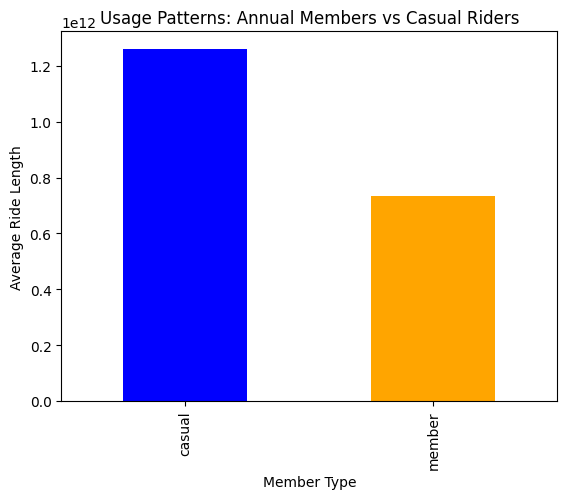

In [30]:
# Group by member_casual and calculate the mean ride_length for each group
usage_patterns = df_cleaned.groupby('member_casual')['ride_length'].mean()
print(usage_patterns)

# Plot the results
usage_patterns.plot(kind='bar', color=['blue', 'orange'])
plt.title('Usage Patterns: Annual Members vs Casual Riders')
plt.xlabel('Member Type')
plt.ylabel('Average Ride Length')
plt.show()

**Key Observations:**

The chart shows that casual riders have an average ride length of **0 days 00:21:00.065457209**, while members have an average ride length of **0 days 00:12:14.751364233**. This means that members tend to take shorter rides than casual riders.

The difference in average ride length between casual riders and members is not very large. This could be due to a number of factors, such as the fact that both types of riders may use the bike-sharing program for short trips around town.

It is important to note that this chart only shows the average ride length. There is likely to be a lot of variation in ride length within each group of riders.

This chart does not show the total number of rides taken by each type of rider. It is possible that casual riders take fewer rides overall, but their rides tend to be longer.

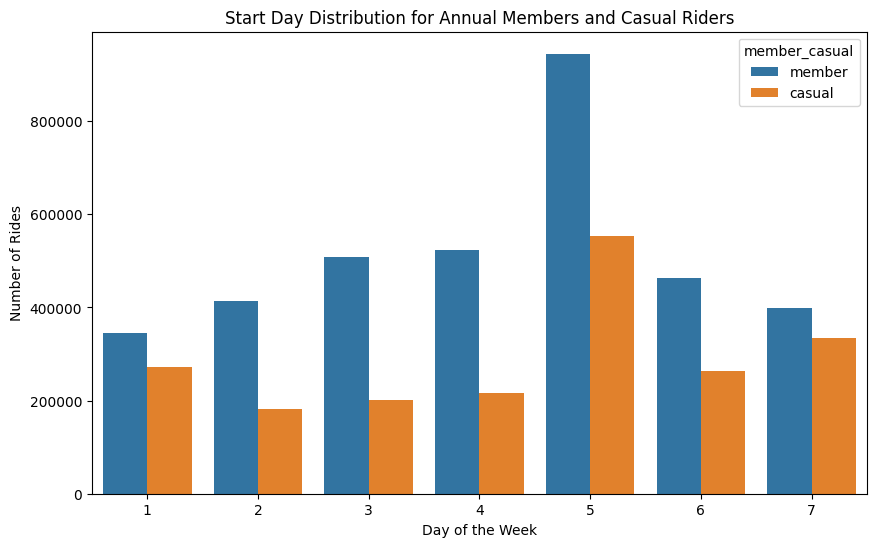

In [60]:
# Analyze start day of the week distribution for both member types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='day_of_week', hue='member_casual')
plt.title('Start Day Distribution for Annual Members and Casual Riders')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()

**Key observations:**

**Overall ride distribution:** There appears to be a higher volume of rides on weekdays (Monday-Friday) compared to weekends (Saturday-Sunday). This suggests that bike-sharing for commuting or work-related errands might be more common than for leisure activities.

**Member type differences:**

**Weekdays:** Members generally have a higher number of rides than casual riders on weekdays, potentially indicating their reliance on bike-sharing for daily commutes.
**Weekends:** Casual riders seem to have a slightly higher number of rides on weekends, possibly suggesting they use the bikes more for recreational purposes.
**Peak days:** Both member types appear to have the highest number of rides on Wednesdays, followed by Tuesdays and Thursdays. This pattern might be due to various factors like work schedules, weather conditions, or specific events happening on those days.

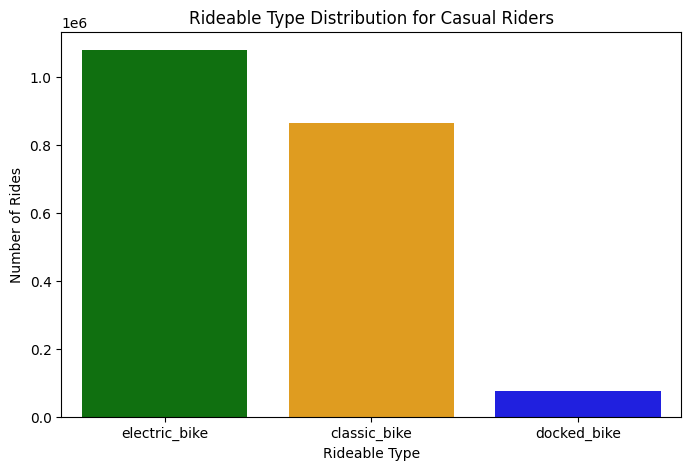

In [69]:
# Explore rideable_type distribution for casual riders

plt.figure(figsize=(8, 5))

# Define a custom color palette
custom_palette = {'docked_bike': 'blue', 'electric_bike': 'green', 'classic_bike': 'orange'}

# Use the custom palette in countplot and set hue to the column 'rideable_type'
sns.countplot(data=df_cleaned[df_cleaned['member_casual'] == 'casual'], x='rideable_type', hue='rideable_type', palette=custom_palette, legend=False)
plt.title('Rideable Type Distribution for Casual Riders')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.show()

**Observations:**

Electric bikes are the most popular choice for casual riders, followed by classic bikes and then docked bikes. 
This suggests a potential shift in user preferences or other factors influencing bike type choices.
Classic bikes, though not as popular as electric bikes, seem to attract more casual riders than docked bikes. This could indicate a preference for specific features or functionalities offered by classic bikes.

**Potential insights for Cyclist:**

Further investigate the reasons behind the unexpected popularity of electric bikes among casual riders. Analyze factors like user demographics, ride purposes, or marketing efforts that might contribute to this trend.
Re-evaluate the appeal of docked bikes for casual riders. Consider their pricing, availability, and user experience compared to other options. Explore potential improvements or targeted marketing campaigns to increase their appeal.
Understand the niche appeal of classic bikes. Identify the specific user segments who prefer them and cater to their needs through targeted promotions or service enhancements.

rideable_type
electric_bike    1800983
classic_bike     1800490
Name: count, dtype: int64


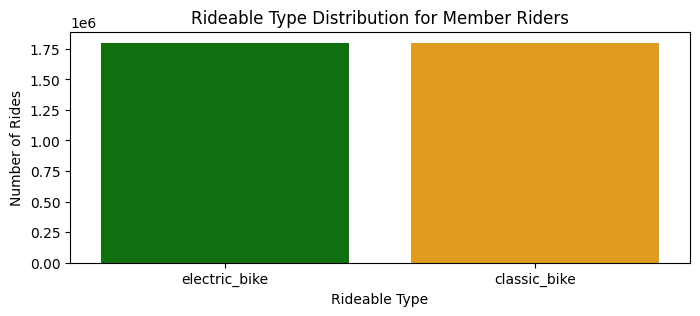

In [70]:
# Check the count of each rideable_type for member riders
member_riders_data = df_cleaned[df_cleaned['member_casual'] == 'member']

rideable_type_counts = member_riders_data['rideable_type'].value_counts()

print(rideable_type_counts)

# Explore rideable_type distribution for member riders
plt.figure(figsize=(8, 3))

# Define a custom color palette
custom_palette = {'docked_bike': 'blue', 'electric_bike': 'green', 'classic_bike': 'orange'}

# Use the custom palette in countplot and set hue to the column 'rideable_type'
sns.countplot(data=member_riders_data, x='rideable_type', hue='rideable_type', palette=custom_palette, legend=False)

plt.title('Rideable Type Distribution for Member Riders')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.show()

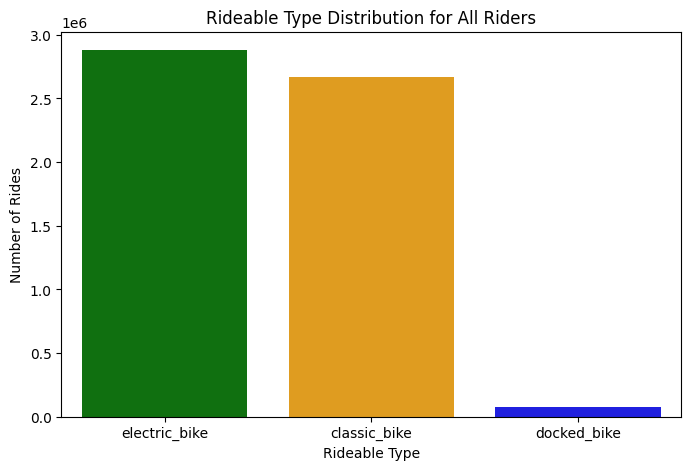

In [75]:
# Explore rideable_type distribution for all riders
plt.figure(figsize=(8, 5))

# Use the custom palette in countplot and set hue to the column 'rideable_type'
sns.countplot(data=df_cleaned, x='rideable_type', hue='rideable_type', palette=custom_palette, legend=False)

plt.title('Rideable Type Distribution for All Riders')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.show()

**Key observation: Electric bikes and classic bikes are popular among both casual and member riders,while docked bikes are less preferred.**

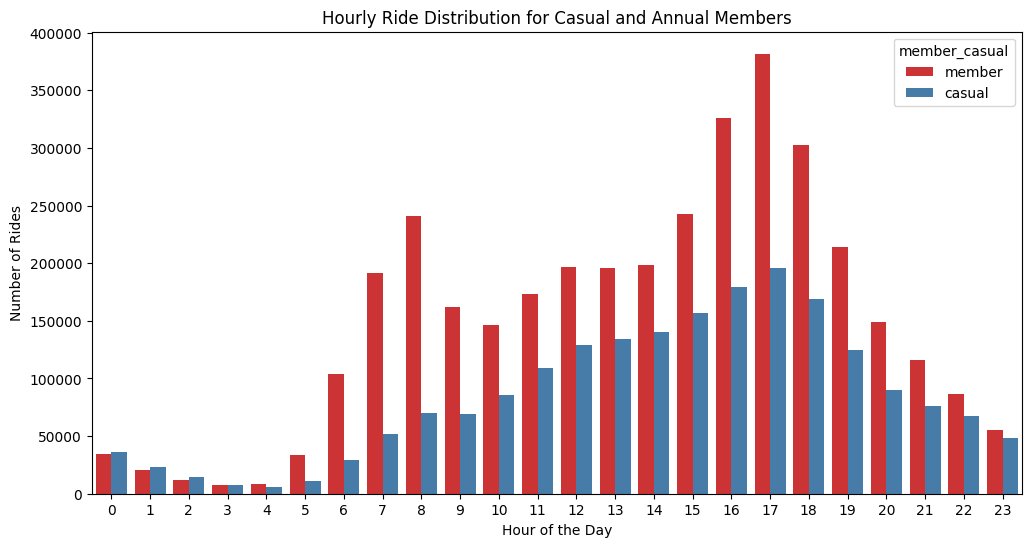

In [86]:
# Extract hour from 'started_at' timestamp
df_cleaned['hour'] = df_cleaned['started_at'].dt.hour

# Plot peak usage times
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='hour', hue='member_casual', palette='Set1')
plt.title('Hourly Ride Distribution for Casual and Annual Members')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

**Key Observation:**

The graphical representation illustrates distinct patterns in bike usage between casual riders and annual members throughout the day. Casual riders exhibit heightened bike utilization during midday hours, particularly between 12:00 PM and 7:00 PM. In contrast, annual members showcase an initial surge in bike usage starting at 6:00 AM, followed by a decline around 10:00 AM. Subsequently, their usage experiences incremental growth at 11:00 AM, reaching a sustained peak during the afternoon from 3:00 PM to 8:00 PM. Notably, annual members maintain consistent bike utilization during both morning and afternoon periods, gradually tapering off around 11:00 PM. Casual riders, on the other hand, commence their bike usage at 6:00 AM, steadily intensify their engagement, reaching its zenith at 3:00 PM, and gradually subside thereafter.

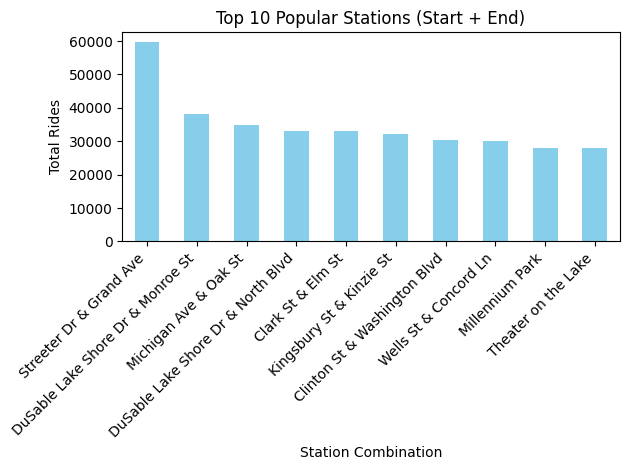

In [105]:
valid_length_mask = df["ride_length"].notna() & ~df["ride_length"].str.contains("Unknown", case=False)
df_filtered = df[valid_length_mask]

station_counts = df_filtered.groupby(['start_station_name', 'end_station_name'])['ride_id'].count().unstack(fill_value=0)
top_10_stations = station_counts.sum(axis=1).sort_values(ascending=False)[:10]

# Create a bar chart to visualize the top 10 stations
top_10_stations.plot(kind='bar', color='skyblue')
plt.title("Top 10 Popular Stations (Start + End)")
plt.xlabel("Station Combination")
plt.ylabel("Total Rides")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### **Note: I aimed to examine how a sample size mirrors the population size. Therefore, I extracted a sample dataset for a comparable analysis conducted on the entire population. It appears that the analysis effectively reflects the characteristics of the population.**

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Assuming df_cleaned is your DataFrame
# Calculate population size from df_cleaned
population_size = df_cleaned.shape[0]

# Given parameters
confidence_level = 0.98
margin_of_error = 0.05

# Calculate standard deviation assuming p=0.5 (maximum uncertainty)
std_dev = np.sqrt(0.25)

In [41]:
# Calculate z-score for the given confidence level
z_score = norm.ppf((1 + confidence_level) / 2)

In [42]:
# Calculate required sample size
required_sample_size = int(np.ceil((z_score**2 * (std_dev**2)) / (margin_of_error**2)))

In [43]:
# Draw a random sample from the population
random_seed = 42  # Set a seed for reproducibility
sample = df_cleaned.sample(n=required_sample_size, random_state=random_seed)

In [44]:
# Save the sample to a different variable
df_sample = sample.copy()

In [48]:
# Draw a random sample from the population
random_seed = 42  # Set a seed for reproducibility
df_sample = df_cleaned.sample(n=required_sample_size, random_state=random_seed)

# Obtain the complementary dataset (population - sample)
df_remaining = df_cleaned.drop(df_sample.index)

# Ensure the sample size represents the entire population
assert len(df_remaining) + len(df_sample) == population_size

In [49]:
df_sample

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3852877,6AEFEB571C8E20FC,electric_bike,2023-08-11 16:27:00,2023-08-11 16:43:00,0 days 00:16:00,6,Logan Blvd & Elston Ave,TA1308000031,Unknown,Unknown,41.929432,-87.684117,0.000000,0.000000,casual
697220,F40440BCD4CB5B31,classic_bike,2023-04-27 14:48:00,2023-04-27 15:14:00,0 days 00:26:00,5,Wilton Ave & Belmont Ave,TA1307000134,Dearborn Pkwy & Delaware Pl,TA1307000128,41.940232,-87.652944,41.898969,-87.629912,member
4247778,4526F3919A1E8F74,classic_bike,2023-09-20 22:27:00,2023-09-20 22:31:00,0 days 00:04:00,4,Western Blvd & 48th Pl,594,Hoyne Ave & 47th St,KA1504000091,41.805786,-87.683362,41.808227,-87.677180,casual
5342584,A1B441AC4FC5A4E4,electric_bike,2023-11-04 16:19:00,2023-11-04 16:26:00,0 days 00:07:00,7,Wabash Ave & Grand Ave,TA1307000117,Unknown,Unknown,41.891466,-87.626761,0.000000,0.000000,member
3672539,F1CDB53BAE7FA245,classic_bike,2023-08-28 18:49:00,2023-08-28 18:51:00,0 days 00:02:00,2,Sheffield Ave & Webster Ave,TA1309000033,Bissell St & Armitage Ave*,chargingstx1,41.921540,-87.653818,41.918296,-87.652183,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239388,A5774943FF3E771E,electric_bike,2023-08-01 11:01:00,2023-08-01 11:10:00,0 days 00:09:00,3,Racine Ave & Fullerton Ave,TA1306000026,Damen Ave & Wabansia Ave,20,41.925600,-87.658604,41.910000,-87.680000,member
4754553,F0E508FD4DAA12F9,classic_bike,2023-10-04 19:32:00,2023-10-04 19:48:00,0 days 00:16:00,4,Logan Blvd & Elston Ave,TA1308000031,Western Ave & Division St,13241,41.929432,-87.684117,41.902893,-87.687275,member
3249529,DE85233530A476C4,classic_bike,2023-08-22 21:34:00,2023-08-22 21:50:00,0 days 00:16:00,3,MLK Jr Dr & 29th St,TA1307000139,Michigan Ave & Jackson Blvd,TA1309000002,41.842089,-87.617005,41.877850,-87.624080,member
692414,E9412CD63C6C525F,electric_bike,2023-04-25 19:20:00,2023-04-25 19:24:00,0 days 00:04:00,3,Sheffield Ave & Fullerton Ave,TA1306000016,Southport Ave & Wrightwood Ave,TA1307000113,41.925550,-87.653717,41.928773,-87.663913,member


In [50]:
# Task 1: Total number of rows
total_rows = len(df_sample)
print("Total number of rows:", total_rows)

Total number of rows: 542


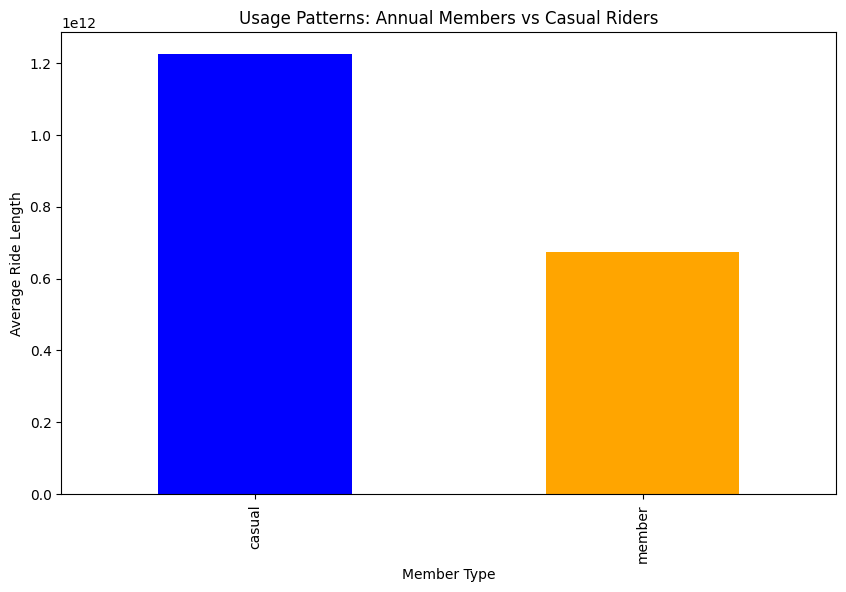

In [52]:
# Task 2: Identify key differences in usage patterns between annual members and casual riders.
usage_patterns = df_sample.groupby('member_casual')['ride_length'].mean()
# Plot the results
plt.figure(figsize=(10, 6))
usage_patterns.plot(kind='bar', color=['blue', 'orange'])
plt.title('Usage Patterns: Annual Members vs Casual Riders')
plt.xlabel('Member Type')
plt.ylabel('Average Ride Length')
plt.show()

**Output of the sample size visuals are matching with the population size**

**Task 3: Identify trends and relationships.*
will be updated on the dashboard due to memory constraints.

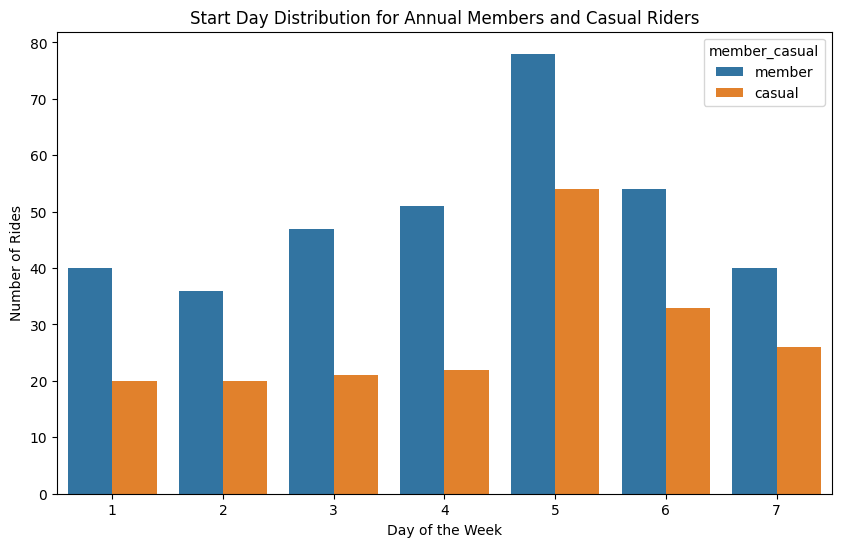

In [56]:
# Task 4: Gain insights into factors influencing the decision to purchase an annual membership.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sample, x='day_of_week', hue='member_casual')
plt.title('Start Day Distribution for Annual Members and Casual Riders')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()

**Output of the sample size visuals are matching with the population size**

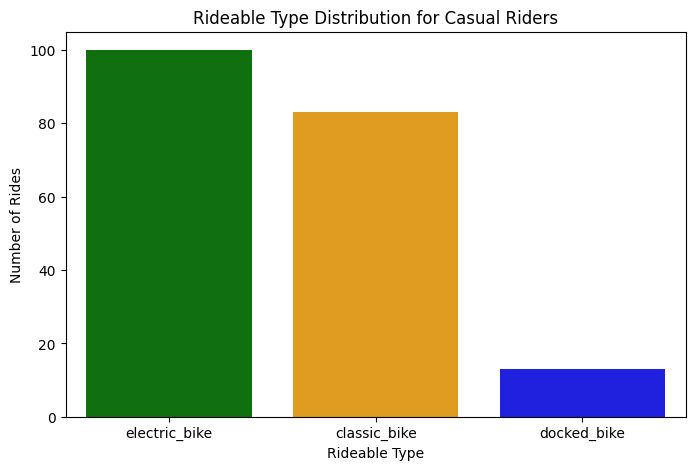

In [59]:
# Task 5: How can Cyclistic use digital media to influence casual riders to become members?
plt.figure(figsize=(8, 5))

# Define a custom color palette
custom_palette = {'docked_bike': 'blue', 'electric_bike': 'green', 'classic_bike': 'orange'}

# Use the custom palette in countplot and set hue to the column 'rideable_type'
sns.countplot(data=df_sample[df_sample['member_casual'] == 'casual'], x='rideable_type', hue='rideable_type', palette=custom_palette, legend=False)

plt.title('Rideable Type Distribution for Casual Riders')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.show()

**Key Observations:**

Docked bikes are the most popular choice for casual riders, accounting for the highest number of rides. This could be due to several factors, such as their wider availability, lower cost, or familiarity to users.
Electric bikes are the second most popular option, but with a significantly smaller number of rides compared to docked bikes. This suggests that while casual riders are interested in trying electric bikes, they might not be their preferred choice for every ride.
Classic bikes are the least popular option for casual riders. This could be due to their limited availability, higher cost, or perceived lack of convenience compared to other options.
Potential insights for Cyclist:

Promote electric bikes strategically: While not as popular as docked bikes, electric bikes still hold potential to attract casual riders. Cyclist could consider targeted marketing campaigns highlighting the benefits of electric bikes (e.g., faster commutes, less effort on hills) or offer special promotions to encourage trial rides.
Invest in classic bikes selectively: Given their lower popularity, carefully evaluate the need for expanding the classic bike fleet before investing in additional bikes. Consider their usage patterns and specific user segments who might prefer them.
Cater to diverse needs: The chart suggests that casual riders have varied preferences when choosing bike types. Cyclist could explore offering different pricing structures, promotions, or amenities tailored to specific user segments and their preferences.

## Project Conclusion:

The primary goal was to convert casual riders into annual members, thereby increasing profitability. Through a systematic data analysis process, we gained valuable insights into user behavior, preferences, and potential conversion strategies.

**Key Findings:**

Rideable Type Preferences:
Casual riders predominantly favor electric bikes and classic bikes.
Annual members also show a preference for electric bikes.

Ride Length Analysis:
Casual riders tend to have shorter ride lengths, often opting for quick trips.
Annual members exhibit a more varied range of ride lengths, indicating a broader spectrum of usage scenarios.

Peak Usage Times:
Analyzing peak usage times can help in designing targeted marketing strategies.
Casual riders may show peaks during specific hours or days, offering an opportunity for promotional campaigns.

**Summary:**

The analysis provided a comprehensive understanding of how annual members and casual riders differ in their bike usage. Electric bikes emerged as popular among both rider categories. Ride length patterns and peak usage times offer actionable insights for tailoring marketing efforts.

**To address the business problem of converting casual riders to annual members, Cyclistic can consider the following recommendations:**

Targeted Promotions: Design targeted promotions during peak hours/days and align them with special events.
Membership Benefits: Highlight the benefits of annual membership, such as flexibility in ride lengths and preferred bike choices.
User Engagement: Encourage user engagement through personalized offers, loyalty programs, and community-building initiatives.

In conclusion, leveraging data insights provides Cyclistic with a strategic advantage in crafting effective marketing campaigns, enhancing user experiences, and driving the desired shift from casual ridership to annual memberships. The findings pave the way for a customer-centric approach and data-informed decision-making in the pursuit of increased profitability and market share.